In [2]:
# Team 3
#   Anirban Mukherjee
#   Manjusha Chava
#   Tae Hyun Je
# 10/31/2020

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as spy

In [3]:
# Question 1

# initializing variables
x = 21
y = "My kid is "
z = " months old today!"

# Type casting x (int) to str
a = y + str(x) + z # String Concatination 
print(a)

My kid is 21 months old today!


In [4]:
# Question 2

# Both lists and tuples are classes of data structure. Lists are dynamic, whereas tuples have static characteristics. 
# Lists are similar to arrays, do not need to be homogenous, and are mutable.
# Tuples are also a sequence data type that can contain elements of different data types, but these are immutable in nature.

In [5]:
# Question 3

#do this thing 3 times
for i in range(3):
    print("Stranger Things 3 was totally awesome!")

#print this once
print("I cannot wait for Stranger Things season 4.")

#print a blank line
print()

#print this 3 times
for i in range(3):
    print("Stranger Things 3 was totally awesome!")

#print this 3 times
for i in range(3):
    print("I cannot wait for Stranger Things season 4.")


Stranger Things 3 was totally awesome!
Stranger Things 3 was totally awesome!
Stranger Things 3 was totally awesome!
I cannot wait for Stranger Things season 4.

Stranger Things 3 was totally awesome!
Stranger Things 3 was totally awesome!
Stranger Things 3 was totally awesome!
I cannot wait for Stranger Things season 4.
I cannot wait for Stranger Things season 4.
I cannot wait for Stranger Things season 4.


In [6]:
#define a function called addOne with an input parameter x
def addOne(x):
    #for any input x add 1
    x = x+1
    #return the result
    return(x)

#for all integers from -5 to 4 add one, print all results
for i in range(-5, 4):
    print(addOne(i))


-4
-3
-2
-1
0
1
2
3
4


In [7]:
# Defining the class "Student"

#make a class Foo2 
class Foo2:

    #value is intialized to 0
    value = 0

    #give this class a field value
    def __init__(self, value):
        self.value = value

    #make a class function called subtract_one
    def subtract_one(self):
        #this function subtracts 1 from the class value
        self.value -= 1
        print(self.value)

    #same idea as before but multiply value by 3
    def multiply_three(self):
        self.value *= 3
        print(self.value)

#create a variable called something to test this class with, give it value 10 
something = Foo2(10)
something.subtract_one()
something.multiply_three()

9
27


In [63]:
# Question 6

#make the arrays a, b, and c 
a = np.array([0,0,0,0,0,0,0])
b = np.array([1,1,1,1,1])
c = np.array([0,0,0,0,0,0,0])

#concatenate the arrays a, b, and c
d = np.concatenate((a,b,c))

# Question 7
#convolve the array d with itself 


# this is using the naive way of using a double for loop to convolve the values in the arrays using the convolution formula. This is the function that was provided.
# def direct_conv(f,g):
#     N1 = len(f)
#     N2 = len(g)
#     N = N1 + N2 - 1
    
#     #place holder for the output
#     y = np.zeros(N)
    
#     m = N-N1
#     n = N-N2    
#     #Padding zeros to x and h to make their length to N
#     f =np.pad(f,(0,m),'constant')
#     g =np.pad(g,(0,n),'constant')

#     #Linear convolution using convolution sum formula
#     for n in range (N):
#         for k in range (N):
#             if n >= k:
#                  y[n] = y[n]+f[n-k]*g[k]
                    
#     return y

# if we used the naive function, we would have called direct_conv() as shown below
# e = direct_conv(d, d)

# we used the convolve function provided by the numpy library as it is more efficient
e = np.convolve(d, d)

# Question 8
#convolve the array e with itself using spy.convolve
spy.convolve(e, e)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  4., 10., 20., 35., 52., 68., 80., 85., 80., 68.,
       52., 35., 20., 10.,  4.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

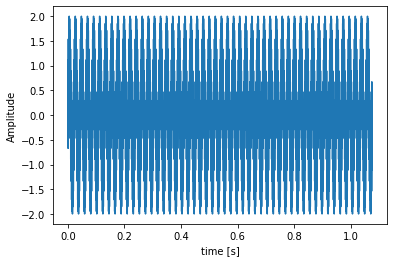

In [60]:
# Question 9 

def Sinusoid(f, Fs, t):
    
    T = 1/Fs                # sampling period
    N = Fs*t                # Total No.of points in the signal
    omega = 2*np.pi*f    # angular frequency for sine waves
    
    t_vec = np.arange(N)*T  # time vector for plotting
    y = np.sin(omega*t_vec)
    
    # plt.plot(t_vec,y)
    # plt.ylabel('Amplitude')
    # plt.xlabel('time [s]')
    # plt.show()
    
    return y
Fs = 44100
t = 1 # change to 0.03 for better visual

sig = Sinusoid(700, Fs, t) # generate sin based on 700Hz, 44.1KHz sampling, and 1 sec of sampling
sig2 = Sinusoid(50, Fs, t) # same as sig but frequency is now 50 Hz
sigSum = sig + sig2 # add two sig together

 # basic plotting for sigSum
plt.plot(np.arange(44100*1)*(1/41000),sigSum)
plt.ylabel('Amplitude')
plt.xlabel('time [s]')
plt.show()


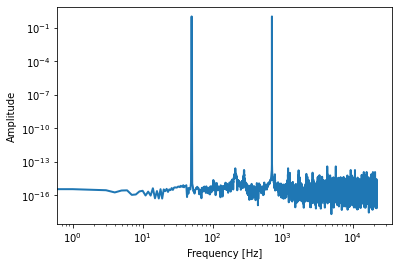

In [62]:
# Question 10 -> Frequency Response of 700 + 50 Hz

def FFT_func(y, N):
    Y_k = np.fft.fft(y)[0:int(N/2)]/N  # FFT function from numpy
    Y_k[1:] = 2*Y_k[1:]                # need to take the single-sided spectrum only
    Pxx = np.abs(Y_k)                  # be sure to get rid of imaginary part
    f = Fs*np.arange((N/2))/N;         # frequency vector for plotting
    
    # plotting
    fig,ax = plt.subplots()
    plt.plot(f,Pxx,linewidth=2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.ylabel('Amplitude')
    plt.xlabel('Frequency [Hz]')
    plt.show()

# samples
N = Fs*t

# call function to display freq response
FFT_func(sigSum, N)